# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [7]:
cities

['kayes',
 'invercargill',
 'blackfoot',
 'guerrero negro',
 'pita',
 'yellowknife',
 'georgetown',
 'mandalgovi',
 'pisco',
 'edinburgh of the seven seas',
 'port mathurin',
 'ushuaia',
 'adamstown',
 'ola',
 'presidencia de la plaza',
 'qamdo',
 'masbate',
 'sitangkai',
 'cascais',
 'port-aux-francais',
 'olonkinbyen',
 'ust-nera',
 'salalah',
 'waitangi',
 'the pas',
 'thompson',
 'albany',
 'puerto natales',
 'fortuna',
 'grytviken',
 'cuito',
 'necochea',
 'port alfred',
 'san patricio',
 'kone',
 'onega',
 "st. john's",
 'west island',
 'nizhniy ingash',
 "arkhangel'sk",
 'port elizabeth',
 'bredasdorp',
 'acatlan de osorio',
 'bulgan',
 'tyukhtet',
 'qaqortoq',
 'coquimbo',
 'ialibu',
 'ancud',
 'avarua',
 'ipora',
 'wegrow',
 'kismayo',
 'verkhnevilyuysk',
 'atafu village',
 'kruisfontein',
 'isafjordur',
 'chibougamau',
 'longyearbyen',
 'callao',
 'kamloops',
 'luderitz',
 'buala',
 'dudinka',
 'woodbridge',
 'mar del plata',
 'whitehorse',
 'maibong',
 'acajutla',
 'cidade v

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base 
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with eah city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({
                    "City":city,
                     "Lat":city_lat,
                    "Lng":city_lng,
                    "Max Temp":city_max_temp,
                    "Humidity":city_humidity,
                    "Cloudiness":city_clouds,
                    "Wind Speed":city_wind,
                    "Country":city_country,
                     "Date":city_date
            })
                          
                          

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kayes
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | blackfoot
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | pita
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | mandalgovi
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | ola
Processing Record 15 of Set 1 | presidencia de la plaza
Processing Record 16 of Set 1 | qamdo
Processing Record 17 of Set 1 | masbate
Processing Record 18 of Set 1 | sitangkai
Processing Record 19 of Set 1 | cascais
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | ust-ne

Processing Record 34 of Set 8 | nar'yan-mar
Processing Record 35 of Set 8 | truro
Processing Record 36 of Set 8 | yokadouma
Processing Record 37 of Set 8 | vila velha
Processing Record 38 of Set 8 | santiago de cao
Processing Record 39 of Set 8 | valdivia
Processing Record 40 of Set 8 | sihanoukville
Processing Record 41 of Set 8 | firuzabad
Processing Record 42 of Set 8 | hadibu
Processing Record 43 of Set 8 | petropavlovsk-kamchatsky
Processing Record 44 of Set 8 | bereznik
Processing Record 45 of Set 8 | portland
Processing Record 46 of Set 8 | banapur
Processing Record 47 of Set 8 | brokopondo
Processing Record 48 of Set 8 | calvinia
Processing Record 49 of Set 8 | cidade velha
Processing Record 0 of Set 9 | ayaguz
City not found. Skipping...
Processing Record 1 of Set 9 | new norfolk
Processing Record 2 of Set 9 | aasiaat
Processing Record 3 of Set 9 | pocone
Processing Record 4 of Set 9 | ad darbasiyah
Processing Record 5 of Set 9 | sitka
Processing Record 6 of Set 9 | borgarnes


Processing Record 25 of Set 12 | el bauga
Processing Record 26 of Set 12 | calingasta
Processing Record 27 of Set 12 | salem
Processing Record 28 of Set 12 | inyati
Processing Record 29 of Set 12 | medina
Processing Record 30 of Set 12 | guozhen
Processing Record 31 of Set 12 | kirensk
Processing Record 32 of Set 12 | gulf shores
Processing Record 33 of Set 12 | klerksdorp
Processing Record 34 of Set 12 | whittlesea
Processing Record 35 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 36 of Set 12 | vondrozo
Processing Record 37 of Set 12 | inyonga
Processing Record 38 of Set 12 | revda
Processing Record 39 of Set 12 | igrim
Processing Record 40 of Set 12 | luanco
Processing Record 41 of Set 12 | antigonish
Processing Record 42 of Set 12 | laughlin
Processing Record 43 of Set 12 | guiratinga
Processing Record 44 of Set 12 | bayanhongor
Processing Record 45 of Set 12 | selfoss
Processing Record 46 of Set 12 | nioro du rip
Processing Record 47 of Set 12 | isang

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kayes,14.0000,-11.0000,33.51,16,100,2.32,ML,1717205857
1,invercargill,-46.4000,168.3500,11.12,88,100,8.05,NZ,1717205857
2,blackfoot,43.1905,-112.3450,21.45,46,8,3.31,US,1717205857
3,guerrero negro,27.9769,-114.0611,16.62,78,6,9.00,MX,1717205857
4,pita,10.8333,-12.5833,24.24,84,100,1.26,GN,1717205857


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv" , index_label = "City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col = "City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kayes,14.0000,-11.0000,33.51,16,100,2.32,ML,1717205857
1,invercargill,-46.4000,168.3500,11.12,88,100,8.05,NZ,1717205857
2,blackfoot,43.1905,-112.3450,21.45,46,8,3.31,US,1717205857
3,guerrero negro,27.9769,-114.0611,16.62,78,6,9.00,MX,1717205857
4,pita,10.8333,-12.5833,24.24,84,100,1.26,GN,1717205857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

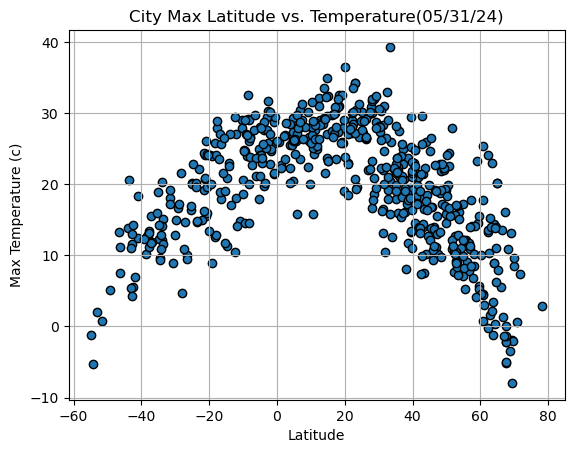

In [22]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y , edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(%s)"%time.strftime("%x")) 
plt.ylabel("Max Temperature (c)")
plt.xlabel("Latitude")
plt.grid (True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

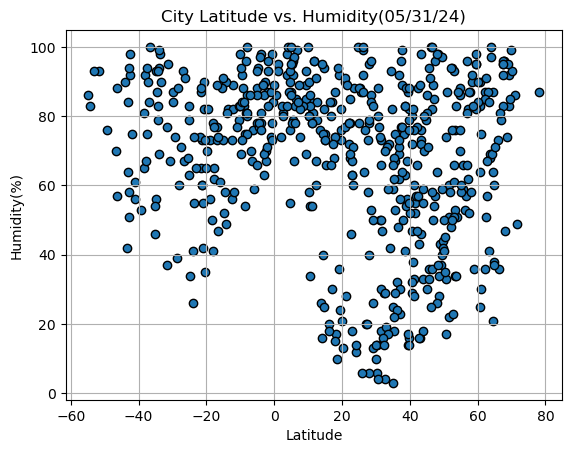

In [25]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x , y, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)"%time.strftime("%x")) 
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid (True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

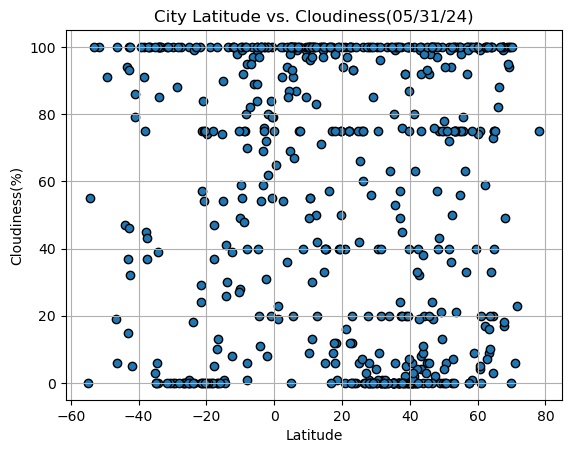

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x , y, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)"%time.strftime("%x")) 
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid (True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

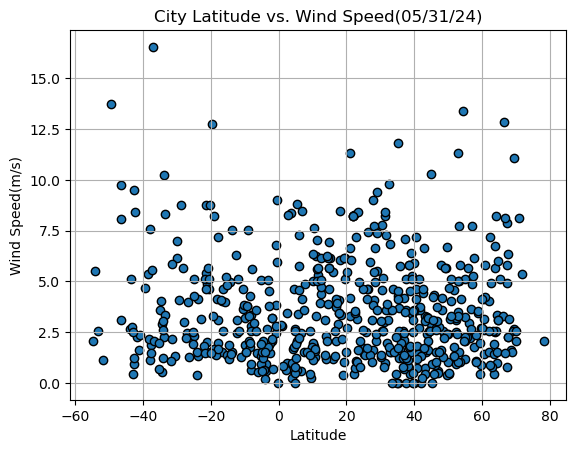

In [31]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x , y, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)"%time.strftime("%x")) 
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid (True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y,title,text_coordinates): 
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kayes,14.0000,-11.0000,33.51,16,100,2.32,ML,1717205857
2,blackfoot,43.1905,-112.3450,21.45,46,8,3.31,US,1717205857
3,guerrero negro,27.9769,-114.0611,16.62,78,6,9.00,MX,1717205857
4,pita,10.8333,-12.5833,24.24,84,100,1.26,GN,1717205857
5,yellowknife,62.4560,-114.3525,10.29,51,100,7.20,CA,1717205857


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,11.12,88,100,8.05,NZ,1717205857
8,pisco,-13.7000,-76.2167,17.03,82,100,1.54,PE,1717205581
9,edinburgh of the seven seas,-37.0676,-12.3116,15.49,84,100,16.55,SH,1717205857
10,port mathurin,-19.6833,63.4167,24.09,70,74,12.77,MU,1717205857
11,ushuaia,-54.8000,-68.3000,-1.19,86,0,2.06,AR,1717205615


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.5909215699371152


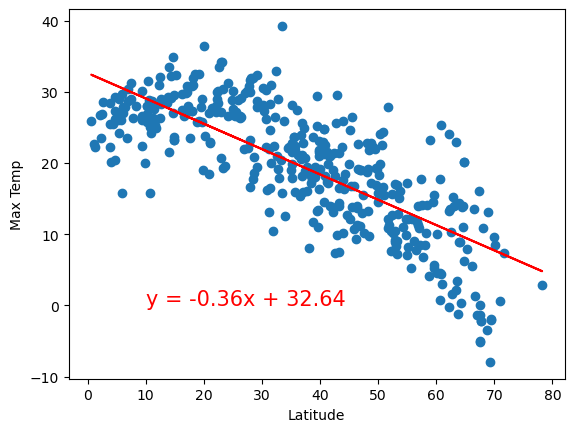

In [49]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is : {rvalue**2}")

plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(10,0), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temp') 
plt.show()

The r-value is : 0.6235984692779583


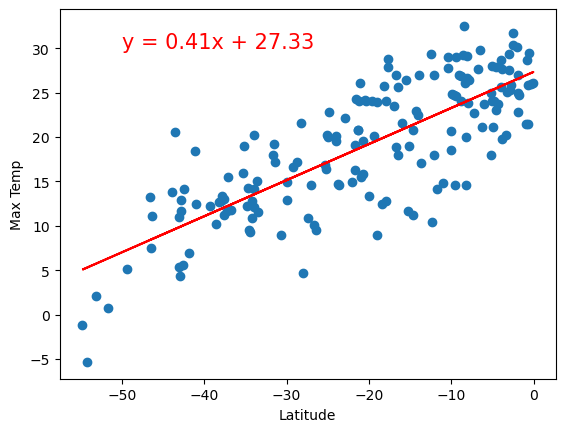

In [51]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is : {rvalue**2}")
plt.scatter(x,y)
plt.plot(x , regress_values,"r-")
plt.annotate(line_eq,(-50,30), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temp') 
plt.show()


**Discussion about the linear relationship:** 
The latitude and max temperature are positively correlated in the southern hemisphere and negatively correlated in the northern hemisphere ,meaning that as we get closer to the equator which is latitude 0 ,the temperatures get higher and as we move further away from the equator the temparatures get lower.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.003981889514641883


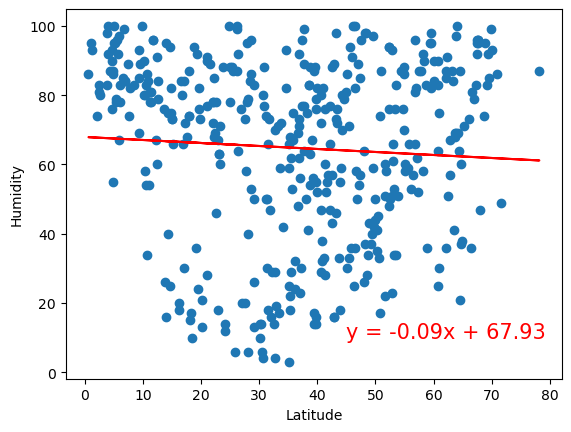

In [55]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is : {rvalue**2}")
plt.scatter(x,y)
plt.plot(x , regress_values,"r-")
plt.annotate(line_eq,(45,10), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.show()


The r-value is : 0.010063053021840733


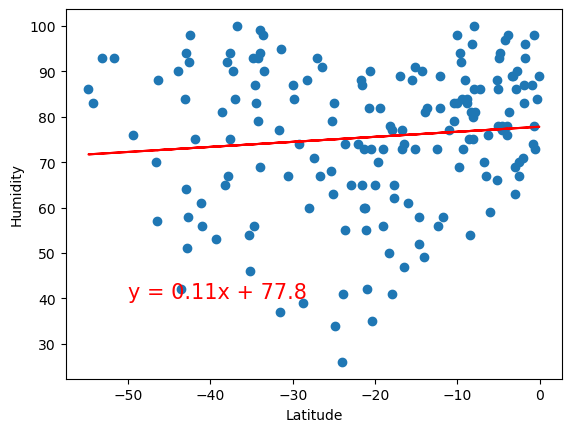

In [57]:
# Southern Hemisphe
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x , y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is : {rvalue**2}")
plt.scatter(x , y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(-50,40), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.show()


**Discussion about the linear relationship:** 
The humidity and latitude are not correlated in the southern hemisphere as well as in the northern hemisphere.This means that the humidity is not a factor conditioned by the relative position to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is :0.004608143448189729


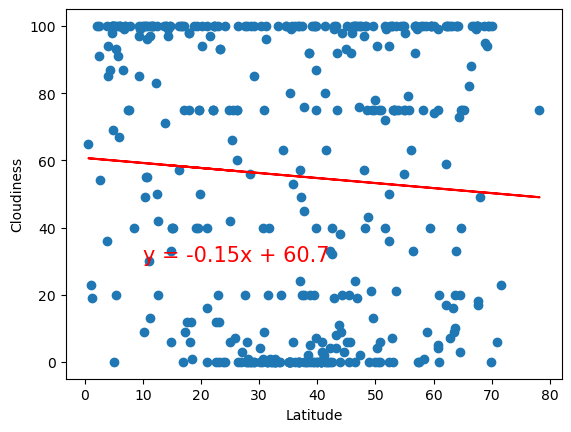

In [62]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is :{rvalue**2}")
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(10,30), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 
plt.show()

The r-value is :0.01133795242884648


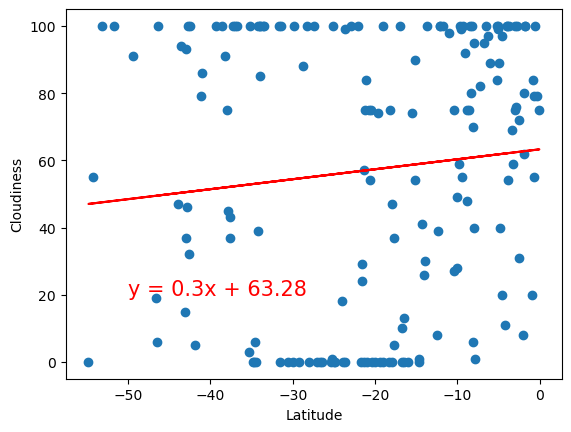

In [64]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is :{rvalue**2}")
plt.scatter(x,y)
plt.plot(x , regress_values,"r-")
plt.annotate(line_eq,(-50,20), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 
plt.show()

**Discussion about the linear relationship:** 
There is no coorelation between latitude and cloudiness in the southern hemisphere as well as in the northern hemisphere, meaning cloudiness is not necessarily conditioned by the relative position of a city to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is :0.00026023533000171583


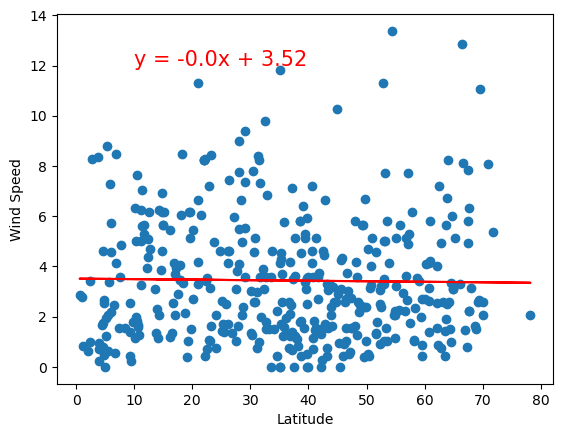

In [69]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is :{rvalue**2}")
plt.scatter(x , y)
plt.plot(x , regress_values,"r-")
plt.annotate(line_eq,(10,12), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed') 
plt.show()

The r-value is :0.04574315102683862


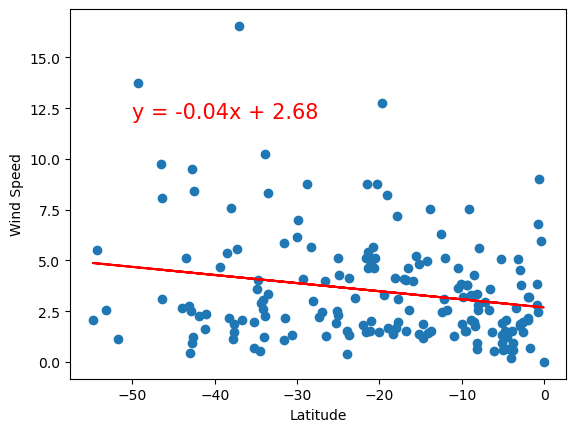

In [71]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x , y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The r-value is :{rvalue**2}")
plt.scatter(x , y)
plt.plot(x , regress_values,"r-")
plt.annotate(line_eq,(-50,12), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed') 
plt.show()

**Discussion about the linear relationship:** 
There is no correlation between latitude and wind speed in the southern hemisphere as well as inthe northern hemisphere.